<a href="https://colab.research.google.com/github/abhidp55/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Data and Libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Git_ML/Kaggle Titanic/train.csv')

#Exploratory Data Analysis

In [143]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [145]:
print(f'Number of columns are : {train.shape[1]}, and number of rows are : {train.shape[0]}')

Number of columns are : 12, and number of rows are : 891


In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [147]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [148]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
train['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [150]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [151]:
train['Embarked'].nunique()

3

##Visualisations

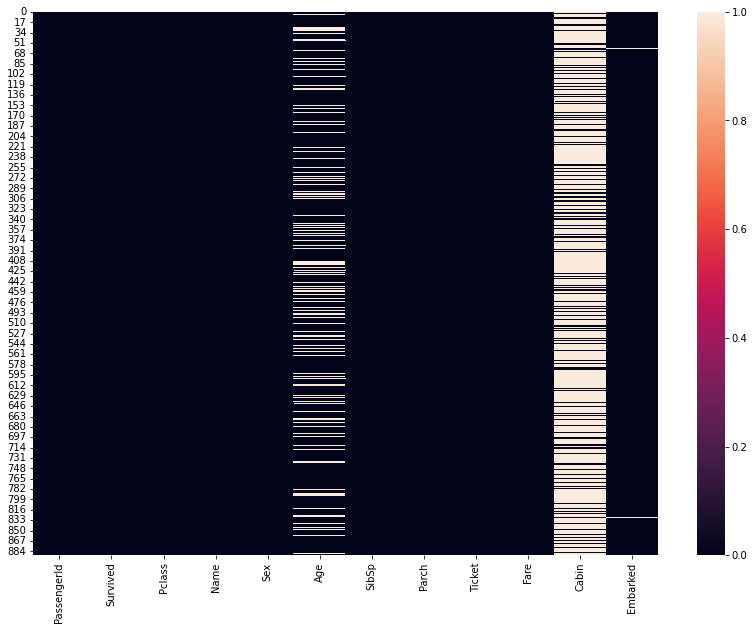

In [152]:
plt.figure(figsize=(14,10))
sns.heatmap(train.isnull())

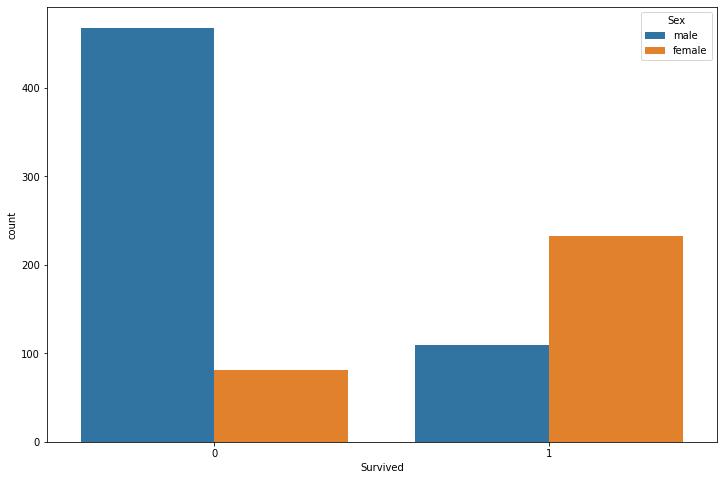

In [153]:
plt.figure(figsize = (12,8))
sns.countplot(train['Survived'], hue = train['Sex'])

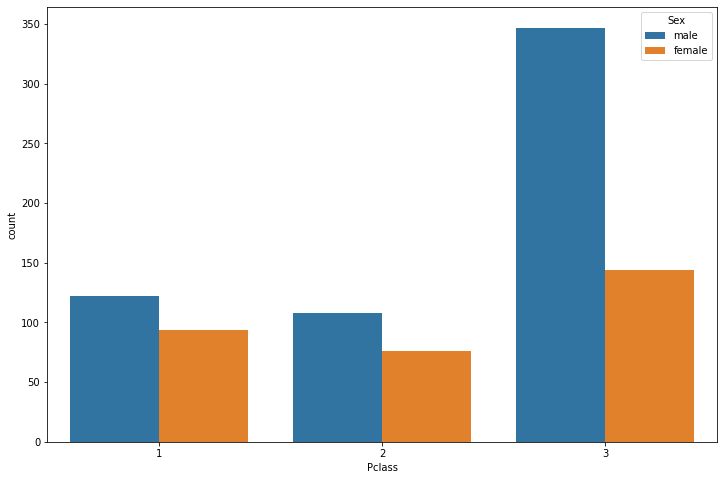

In [154]:
plt.figure(figsize = (12,8))
sns.countplot(train['Pclass'], hue = train['Sex'])

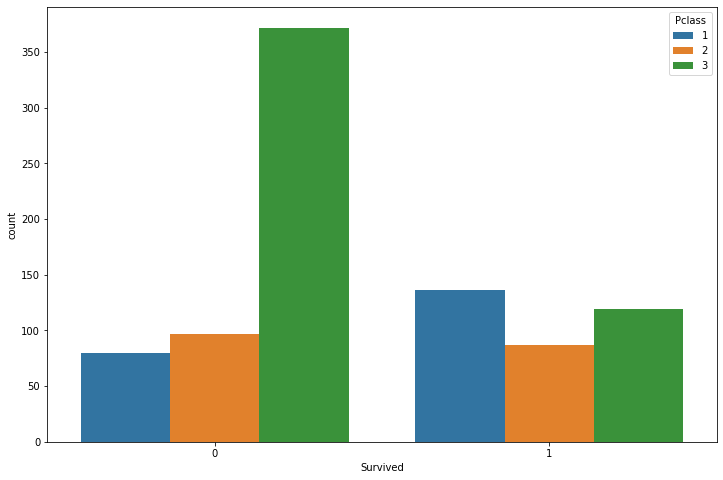

In [155]:
plt.figure(figsize = (12, 8))
sns.countplot(x = train['Survived'], hue = train['Pclass'])

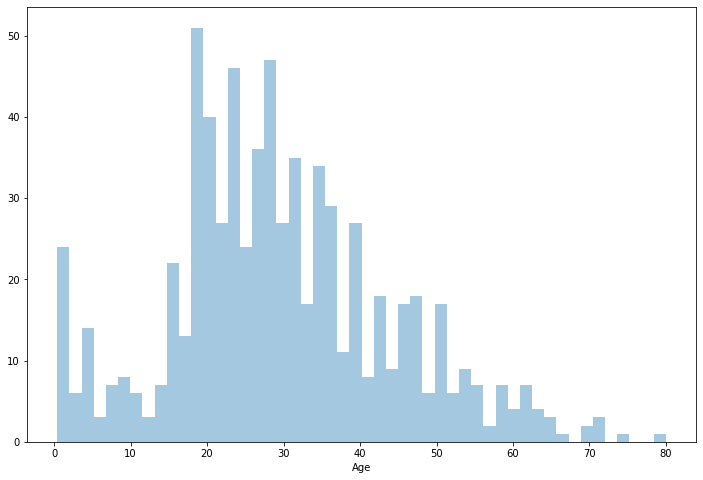

In [156]:
plt.figure(figsize = (12, 8))
sns.distplot(train['Age'].dropna(), kde = False, bins = 50) 

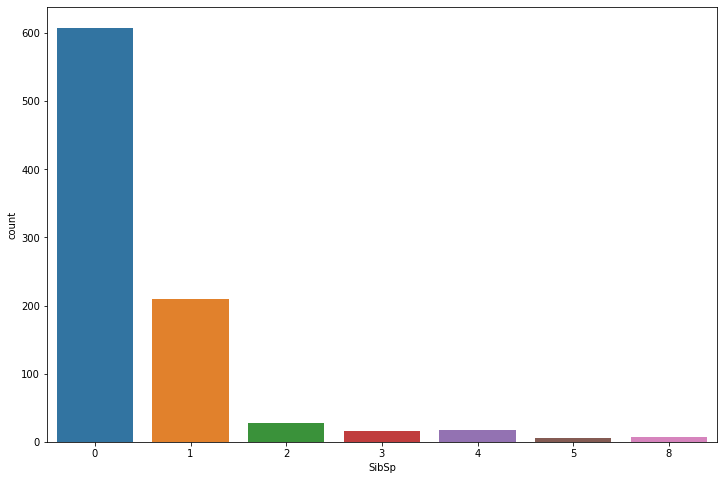

In [157]:
plt.figure(figsize = (12, 8))
sns.countplot(train['SibSp'])

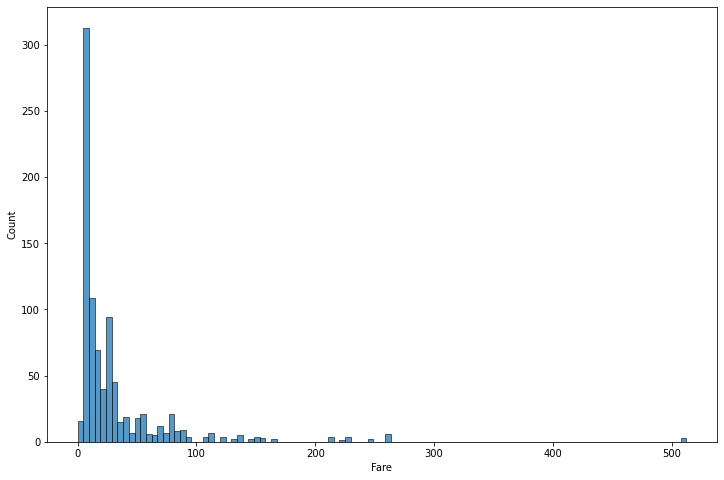

In [158]:
plt.figure(figsize = (12, 8))
sns.histplot(train['Fare'])

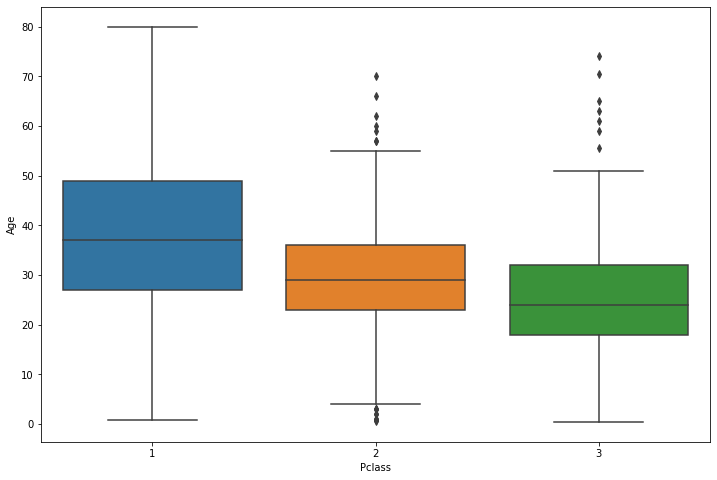

In [159]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = train['Pclass'], y = train['Age'])

In [160]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


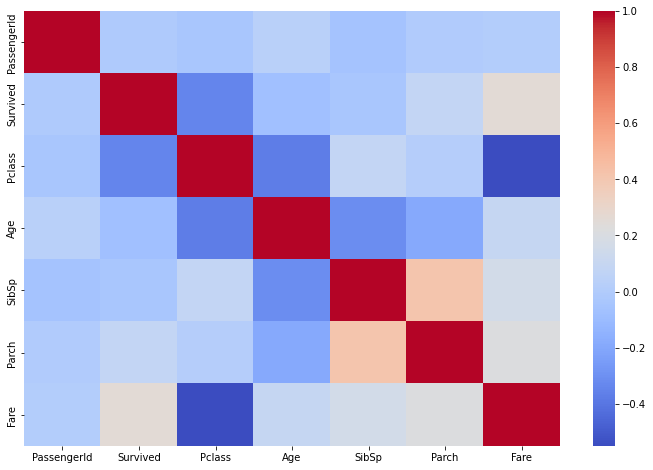

In [161]:
plt.figure(figsize = (12, 8))
sns.heatmap(train.corr(), cmap = 'coolwarm')

#Data Cleaning

In [162]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], inplace = True, axis = 1)

In [164]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##Filling in null values

###Age

In [165]:
def impute_age(cols):

  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    elif pclass == 3:
      return 24
  else:
    return age

In [166]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

###Embarked

In [167]:
train['Embarked'].value_counts().index[0]

'S'

In [168]:
train['Embarked']= train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

In [169]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##OneHotEncoding

### We do not OneHotEncode 'Parch' because test data has different values

In [170]:
pclass = pd.get_dummies(train['Pclass'],drop_first = True)
sex = pd.get_dummies(train['Sex'],drop_first = True)
embarked = pd.get_dummies(train['Embarked'],drop_first = True)
train.drop(['Pclass', 'Sex', 'Embarked'],axis = 1,inplace = True)
train = pd.concat([train, pclass, sex, embarked],axis = 1)

In [171]:
train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


#Train Test Split (no need to split due of test.csv but for verifying accuracy, we split)

In [172]:
X = train.drop('Survived', axis = 1).values
y = train['Survived'].values

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##Normalise Data

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Import ML models

In [177]:
import sklearn
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve

##Logistic Regression

In [178]:
log = LogisticRegression()
start_time = time.time()
log.fit(X_train, y_train)
total_time_training_log = time.time() - start_time
start_time = time.time()
y_pred = log.predict(X_test)
total_time_inference_log = time.time() - start_time

In [179]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a Logistic Regression Classifier is", total_time_training_log)
print("Total Time for inference of a Logistic Regression Classifier is", total_time_inference_log)

acc_logreg = accuracy_score(y_test,y_pred)
recall_logreg = recall_score(y_test,y_pred)
precision_logreg = precision_score(y_test,y_pred)
f1_logreg = f1_score(y_test,y_pred)

Accuracy Score: 0.8161434977578476


Confusion Matrix: 
[[121  20]
 [ 21  61]]


Area Under Curve: 0.8010292336965923


Recall score: 0.7439024390243902


Precision score: 0.7530864197530864


f1 score: 0.7484662576687118


Total Time for training a Logistic Regression Classifier is 0.011644124984741211
Total Time for inference of a Logistic Regression Classifier is 0.00037789344787597656


In [180]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.86      0.86       141
    Survived       0.75      0.74      0.75        82

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



###Log Reg Grid Search

In [181]:
param_grid={'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]} #l1 lasso l2 ridge
logreg=LogisticRegression()
grid=GridSearchCV(logreg,param_grid,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [182]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8053369516056084


In [183]:
log_grid = LogisticRegression(C = 100, penalty = 'l2')
log_grid.fit(X_train, y_train)
y_pred = log_grid.predict(X_test)
log_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       141
           1       0.74      0.74      0.74        82

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



##SVC

In [184]:
svc = SVC()
start_time = time.time()
svc.fit(X_train, y_train)
total_time_training_svc = time.time() - start_time
start_time = time.time()
y_pred = svc.predict(X_test)
total_time_inference_svc = time.time() - start_time
acc_svc = accuracy_score(y_test, y_pred)
print("Total Time for training a SVC is", total_time_training_svc)
print("Total Time for inference of a SVC is", total_time_inference_svc)

Total Time for training a SVC is 0.017644405364990234
Total Time for inference of a SVC is 0.0051038265228271484


In [185]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred)}')

recall_svc = recall_score(y_test, y_pred)
precision_svc = precision_score(y_test, y_pred)
f1_svc = f1_score(y_test, y_pred)

Accuracy Score: 0.8565022421524664
Confusion Matrix: 
[[137   4]
 [ 28  54]]
Area Under Curve: 0.8150838955198063
Recall score: 0.6585365853658537
Precision score: 0.9310344827586207
f1 score: 0.7714285714285715


In [186]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.97      0.90       141
    Survived       0.93      0.66      0.77        82

    accuracy                           0.86       223
   macro avg       0.88      0.82      0.83       223
weighted avg       0.87      0.86      0.85       223



###SVC Grid Search

In [187]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [188]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [189]:
svc_grid = SVC(C = 1000, gamma = 0.0001)
svc_grid.fit(X_train, y_train)
y_pred = svc_grid.predict(X_test)
svc_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       141
           1       0.75      0.74      0.75        82

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



##XGBoost

In [190]:
start_time = time.time()
clf = XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0).fit(X_train, y_train)
total_time_training_xgb = time.time() - start_time
start_time = time.time()
y_test = clf.predict(X_test)
total_time_inference_xgb = time.time() - start_time

In [191]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a XGBoost is", total_time_training_xgb)
print("Total Time for inference of a XGBoost is", total_time_inference_xgb)

acc_xgb = accuracy_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

Accuracy Score: 0.8654708520179372


Confusion Matrix: 
[[127  15]
 [ 15  66]]


Area Under Curve: 0.8545905059989567


Recall score: 0.8148148148148148


Precision score: 0.8148148148148148


f1 score: 0.8148148148148148


Total Time for training a XGBoost is 0.0350341796875
Total Time for inference of a XGBoost is 0.0010273456573486328


In [192]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.89      0.89      0.89       142
    Survived       0.81      0.81      0.81        81

    accuracy                           0.87       223
   macro avg       0.85      0.85      0.85       223
weighted avg       0.87      0.87      0.87       223



###XGBoost Grid Search

In [193]:
params = {
        'min_child_weight': [1, 2.5, 5, 7.5, 10],
        'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True)

grid = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train))
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f58709d6dd0>,
                   estimator=XGBClassifier(), n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2.5, 5, 7.5,
                                                             10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc')

In [194]:
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best hyperparameters:')
print(grid.best_params_)


 Best estimator:
XGBClassifier(colsample_bytree=1.0, gamma=2, max_depth=4, subsample=1.0)

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 1.0}


In [195]:
xgb_grid = XGBClassifier(n_estimators=100, learning_rate=0.001, max_depth=5, subsample = 0.6, min_child_weight = 2.5, gamma = 1.5, colsample_bytree = 1).fit(X_train, y_train)
y_pred = xgb_grid.predict(X_test)
xgb_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       142
           1       0.87      0.88      0.87        81

    accuracy                           0.91       223
   macro avg       0.90      0.90      0.90       223
weighted avg       0.91      0.91      0.91       223



##Decision Tree

In [196]:
tree = DecisionTreeClassifier()
start_time = time.time()
tree.fit(X_train, y_train)
total_time_training_tree = time.time() - start_time
start_time = time.time()
y_pred = tree.predict(X_test)
total_time_inference_tree = time.time() - start_time

In [197]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')


print("Total Time for training a Decision Tree is", total_time_training_tree)
print("Total Time for inference of a Decision Tree is", total_time_inference_tree)

acc_tree = accuracy_score(y_test, y_pred)
recall_tree = recall_score(y_test, y_pred)
precision_tree = precision_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)

Accuracy Score: 0.8699551569506726


Confusion Matrix: 
[[127  15]
 [ 14  67]]


Area Under Curve: 0.8607633455051296


Recall score: 0.8271604938271605


Precision score: 0.8170731707317073


f1 score: 0.8220858895705522


Total Time for training a Decision Tree is 0.0061533451080322266
Total Time for inference of a Decision Tree is 0.0005097389221191406


In [198]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.90      0.89      0.90       142
    Survived       0.82      0.83      0.82        81

    accuracy                           0.87       223
   macro avg       0.86      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



###Decision Tree Grid Search

In [199]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [200]:
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best hyperparameters:')
print(grid.best_params_)


 Best estimator:
DecisionTreeClassifier(max_depth=7)

 Best hyperparameters:
{'criterion': 'gini', 'max_depth': 7}


In [201]:
tree_grid = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
tree_grid.fit(X_train, y_train)
y_pred = tree_grid.predict(X_test)
tree_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       142
           1       0.97      0.70      0.81        81

    accuracy                           0.88       223
   macro avg       0.91      0.84      0.86       223
weighted avg       0.89      0.88      0.88       223



##Random Forest

In [202]:
rfc = RandomForestClassifier(n_estimators=75)
start_time = time.time()
rfc.fit(X_train, y_train)
total_time_training_rfc = time.time() - start_time
start_time = time.time()
y_pred = rfc.predict(X_test)
total_time_inference_rfc = time.time() - start_time

In [203]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a Random Forest Classifier is", total_time_training_rfc)
print("Total Time for inference of a Random Forest Classifier is", total_time_inference_rfc)

acc_rfc = accuracy_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
f1_rfc = f1_score(y_test, y_pred)

Accuracy Score: 0.9237668161434978


Confusion Matrix: 
[[137   5]
 [ 12  69]]


Area Under Curve: 0.908320292123109


Recall score: 0.8518518518518519


Precision score: 0.9324324324324325


f1 score: 0.8903225806451613


Total Time for training a Random Forest Classifier is 0.14639568328857422
Total Time for inference of a Random Forest Classifier is 0.01402902603149414


In [204]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.92      0.96      0.94       142
    Survived       0.93      0.85      0.89        81

    accuracy                           0.92       223
   macro avg       0.93      0.91      0.92       223
weighted avg       0.92      0.92      0.92       223



###Random Forest Grid Search

In [205]:
param_grid = { 
    'n_estimators': [75, 140, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [75, 140, 200, 500]})

In [206]:
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best hyperparameters:')
print(grid.best_params_)


 Best estimator:
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=75)

 Best hyperparameters:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 75}


In [207]:
rfc_grid = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 'auto', n_estimators= 200)
rfc_grid.fit(X_train, y_train)
y_pred = rfc_grid.predict(X_test)
rbf_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       142
           1       0.95      0.78      0.86        81

    accuracy                           0.91       223
   macro avg       0.92      0.88      0.89       223
weighted avg       0.91      0.91      0.90       223



##Bagging Decision Tree

In [208]:
kfold = sklearn.model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
start_time = time.time()
model.fit(X_train, y_train)
total_time_training_bc = time.time() - start_time
start_time = time.time()
y_pred = model.predict(X_test)
total_time_inference_bc = time.time() - start_time

In [209]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a Bagging Decision Tree is", total_time_training_bc)
print("Total Time for inference of a Bagging Decision Tree is", total_time_inference_bc)

acc_bc = accuracy_score(y_test, y_pred)
recall_bc = recall_score(y_test, y_pred)
precision_bc = precision_score(y_test, y_pred)
f1_bc = f1_score(y_test, y_pred)


Accuracy Score: 0.9192825112107623


Confusion Matrix: 
[[135   7]
 [ 11  70]]


Area Under Curve: 0.907450878108155


Recall score: 0.8641975308641975


Precision score: 0.9090909090909091


f1 score: 0.8860759493670887


Total Time for training a Bagging Decision Tree is 0.25717997550964355
Total Time for inference of a Bagging Decision Tree is 0.016636371612548828


In [210]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.92      0.95      0.94       142
    Survived       0.91      0.86      0.89        81

    accuracy                           0.92       223
   macro avg       0.92      0.91      0.91       223
weighted avg       0.92      0.92      0.92       223



##Naive Bayes

In [211]:
clf = GaussianNB()
start_time = time.time()
clf = clf.fit(X_train, y_train)
total_time_training_nb = time.time() - start_time
start_time = time.time()
y_pred = clf.predict(X_test)
total_time_inference_nb = time.time() - start_time

In [212]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a Naive Bayes Classifier is", total_time_training_nb)
print("Total Time for inference of a Naive Bayes Classifier is", total_time_inference_nb)


acc_nb = accuracy_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)


Accuracy Score: 0.8923766816143498


Confusion Matrix: 
[[130  12]
 [ 12  69]]


Area Under Curve: 0.8836724047991653


Recall score: 0.8518518518518519


Precision score: 0.8518518518518519


f1 score: 0.8518518518518519


Total Time for training a Naive Bayes Classifier is 0.0020530223846435547
Total Time for inference of a Naive Bayes Classifier is 0.0006201267242431641


In [213]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.92      0.92      0.92       142
    Survived       0.85      0.85      0.85        81

    accuracy                           0.89       223
   macro avg       0.88      0.88      0.88       223
weighted avg       0.89      0.89      0.89       223



##KNN

In [214]:
knn = KNeighborsClassifier(n_neighbors=2)
start_time = time.time()
knn.fit(X_train, y_train)
total_time_training_knn = time.time() - start_time
start_time = time.time()
y_pred = knn.predict(X_test)
total_time_inference_knn = time.time() - start_time

In [215]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a KNN is", total_time_training_knn)
print("Total Time for inference of a KNN is", total_time_inference_knn)

acc_knn = accuracy_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

Accuracy Score: 0.852017937219731


Confusion Matrix: 
[[137   5]
 [ 28  53]]


Area Under Curve: 0.8095548600243436


Recall score: 0.654320987654321


Precision score: 0.9137931034482759


f1 score: 0.7625899280575539


Total Time for training a KNN is 0.002577543258666992
Total Time for inference of a KNN is 0.011515140533447266


In [216]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.96      0.89       142
    Survived       0.91      0.65      0.76        81

    accuracy                           0.85       223
   macro avg       0.87      0.81      0.83       223
weighted avg       0.86      0.85      0.85       223



###Elbow Method

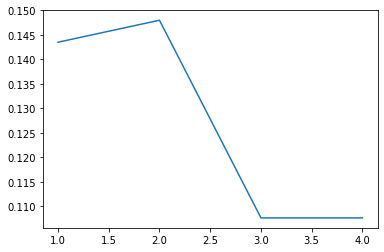

In [217]:
error_rate = []
range_knn = range(1,5)
for i in range_knn:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.plot(range_knn, error_rate)

##Deep Learning

In [218]:
import keras
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

In [219]:
y_train = np.reshape(y_train, (len(y_train), 1))

In [220]:
model = Sequential()
model.add(Dense(64, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [221]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [222]:
number_of_iterations = 20
batch_size = 512
start_time = time.time()
model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=1, validation_data=(X_test, y_test))
total_time_training_dl = time.time() - start_time

Epoch 1/20
2/2 [==============================] - 1s 166ms/step - loss: 0.7401 - accuracy: 0.4281 - val_loss: 0.7554 - val_accuracy: 0.3857
Epoch 2/20
2/2 [==============================] - 0s 29ms/step - loss: 0.7378 - accuracy: 0.4296 - val_loss: 0.7527 - val_accuracy: 0.3857
Epoch 3/20
2/2 [==============================] - 0s 27ms/step - loss: 0.7356 - accuracy: 0.4326 - val_loss: 0.7500 - val_accuracy: 0.3857
Epoch 4/20
2/2 [==============================] - 0s 30ms/step - loss: 0.7335 - accuracy: 0.4326 - val_loss: 0.7474 - val_accuracy: 0.3857
Epoch 5/20
2/2 [==============================] - 0s 55ms/step - loss: 0.7313 - accuracy: 0.4326 - val_loss: 0.7447 - val_accuracy: 0.3946
Epoch 6/20
2/2 [==============================] - 0s 29ms/step - loss: 0.7292 - accuracy: 0.4341 - val_loss: 0.7421 - val_accuracy: 0.3857
Epoch 7/20
2/2 [==============================] - 0s 26ms/step - loss: 0.7270 - accuracy: 0.4207 - val_loss: 0.7396 - val_accuracy: 0.3946
Epoch 8/20
2/2 [==========

In [223]:
start_time = time.time()
y_pred_value = model.predict(X_test)
total_time_inference_dl = time.time() - start_time
y_pred = [0 if each > 0.5 else 1 for each in y_pred_value]
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')
print(classification_report(y_test, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))
print('\n')

print("Total Time for training a Deep learning model is", total_time_training_dl)
print("Total Time for inference of a Deep learning model is", total_time_inference_dl)

acc_dl = accuracy_score(y_test, y_pred)
recall_dl = recall_score(y_test, y_pred)
precision_dl = precision_score(y_test, y_pred)
f1_dl = f1_score(y_test, y_pred)

Accuracy Score: 0.5381165919282511


Confusion Matrix: 
[[107  35]
 [ 68  13]]


Area Under Curve: 0.4570074769605286


Recall score: 0.16049382716049382


Precision score: 0.2708333333333333


f1 score: 0.20155038759689922


                precision    recall  f1-score   support

Not Fraudulent       0.61      0.75      0.68       142
    Fraudulent       0.27      0.16      0.20        81

      accuracy                           0.54       223
     macro avg       0.44      0.46      0.44       223
  weighted avg       0.49      0.54      0.50       223



Total Time for training a Deep learning model is 1.534311056137085
Total Time for inference of a Deep learning model is 0.10189008712768555


#Results

In [224]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVC', 
              'XGBoost', 'Decision Trees', 'Random Forest Classifier', 
              'Bagging Decision Tree','Naive Bayes','KNN','Deep Learning'],

    'Accuracy': [acc_logreg,acc_svc, 
              acc_xgb, acc_tree, acc_rfc, 
              acc_bc, acc_nb, acc_knn, acc_dl],

    'Recall': [recall_logreg,recall_svc, 
    recall_xgb, recall_tree, recall_rfc, 
    recall_bc, recall_nb, recall_knn, recall_dl],

    'Precision': [precision_logreg,precision_svc, 
    precision_xgb, precision_tree, precision_rfc, 
    precision_bc, precision_nb, precision_knn, precision_dl],

    'F1': [f1_logreg,f1_svc, 
     f1_xgb, f1_tree, f1_rfc, 
     f1_bc, f1_nb, f1_knn, f1_dl],

     'Training Time': [total_time_training_log,total_time_training_svc, 
      total_time_training_xgb, total_time_training_tree, total_time_training_rfc, 
      total_time_training_bc, total_time_training_nb, total_time_training_knn, total_time_training_dl],

      'Inference Time': [total_time_inference_log,total_time_inference_svc, 
      total_time_inference_xgb, total_time_inference_tree, total_time_inference_rfc, 
      total_time_inference_bc, total_time_inference_nb, total_time_inference_knn, total_time_inference_dl]})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Recall,Precision,F1,Training Time,Inference Time
4,Random Forest Classifier,0.923767,0.851852,0.932432,0.890323,0.146396,0.014029
5,Bagging Decision Tree,0.919283,0.864198,0.909091,0.886076,0.257180,0.016636
6,Naive Bayes,0.892377,0.851852,0.851852,0.851852,0.002053,0.000620
3,Decision Trees,0.869955,0.827160,0.817073,0.822086,0.006153,0.000510
2,XGBoost,0.865471,0.814815,0.814815,0.814815,0.035034,0.001027
1,SVC,0.856502,0.658537,0.931034,0.771429,0.017644,0.005104
7,KNN,0.852018,0.654321,0.913793,0.762590,0.002578,0.011515
0,Logistic Regression,0.816143,0.743902,0.753086,0.748466,0.011644,0.000378
8,Deep Learning,0.538117,0.160494,0.270833,0.201550,1.534311,0.101890


#GridSearch Results

In [225]:
models = pd.DataFrame({
    
    'Model': ['LogReg_Grid', 'SVC_Grid', 'XGBoost_grid', 'DecisionTree_grid', 'RandomForest_grid'],

    'Accuracy': [log_grid_acc, svc_grid_acc, xgb_grid_acc, tree_grid_acc, rbf_grid_acc]

})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,XGBoost_grid,0.905830
4,RandomForest_grid,0.905830
3,DecisionTree_grid,0.883408
1,SVC_Grid,0.816143
0,LogReg_Grid,0.811659


In [226]:
## Bagging Decision Tree has highest accuracy of the lot

#Clean Test data and export results

In [227]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Git_ML/Kaggle Titanic/test.csv')

In [228]:
print(f'Number of columns are : {test.shape[1]}, and number of rows are : {test.shape[0]}')

Number of columns are : 11, and number of rows are : 418


In [229]:
test.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], inplace = True, axis = 1)

In [230]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)

## Fill nulls value with mean (Fare has 1 null value)

In [231]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [232]:
mean_val = test['Fare'].mean()
test['Fare'].fillna(value = mean_val, inplace = True)

In [233]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [234]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [235]:
pclass = pd.get_dummies(test['Pclass'],drop_first = True)
sex = pd.get_dummies(test['Sex'],drop_first = True)
embarked = pd.get_dummies(test['Embarked'],drop_first = True)
test.drop(['Pclass', 'Sex', 'Embarked'],axis = 1,inplace = True)
test = pd.concat([test, pclass, sex, embarked],axis = 1)

In [236]:
test.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


#Creating final ML model


In [237]:
X_train = train.drop('Survived', axis = 1).values
y_train = train['Survived'].values
X_test = test.values

In [238]:
print(f'X_train shape is {X_train.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'X_test shape is {X_test.shape}')

X_train shape is (891, 9)
y_train shape is (891,)
X_test shape is (418, 9)


In [239]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Shape of array is {y_pred.shape}')
y_pred

Shape of array is (418,)


array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#Create export csv

In [240]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Git_ML/Kaggle Titanic/test.csv')

In [241]:
result = pd.DataFrame({
    
    'PassengerId' : test['PassengerId'],
    'Survived' : y_pred

})

In [242]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [243]:
result.to_csv('submission.csv', index = False)